In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.preprocessing import scale

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve
import matplotlib.pyplot as plt

In [7]:
all_data = pd.read_csv("../../output_files/physics_pairs_data.csv")

In [2]:
training_data = pd.read_csv("../../output_files/training_data.csv")
testing_data = pd.read_csv("../../output_files/testing_data.csv")

In [3]:
columns = ["f0", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8", "f9",
            "f10", "f11", "f12", "f13", "f14", "f15", "f16", "f17", "f18", "f19",
            "f20", "f21", "f22", "f23", "f24", "f25", "f26", "f27", "f28", "f29",
            "f30", "f31", "f32", "f33", "f34", "f35", "f36", "f37"]

def normalize_array(x):
    x = np.array(x)
    min_x = np.min(x)
    max_x = np.max(x)
    x = (x - min_x)/(max_x - min_x)
    return x


def normalized_df(df):
    X = [normalize_array([df[[col]].values[i][0] for i in range(len(df[[col]]))]) for col in columns]
    X = np.array(X)
    return X.T

In [8]:
all_data = normalized_df(all_data)

In [11]:
np.max(all_data)

1.0

In [12]:
np.min(all_data)

0.0

In [4]:
X_train = training_data[["f0", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8", "f9",
            "f10", "f11", "f12", "f13", "f14", "f15", "f16", "f17", "f18", "f19",
            "f20", "f21", "f22", "f23", "f24", "f25", "f26", "f27", "f28", "f29",
            "f30", "f31", "f32", "f33", "f34", "f35", "f36", "f37"]]
X_train = normalized_df(X_train)

In [5]:
y_train = training_data[["relation"]].to_numpy().ravel()


In [6]:
X_test = testing_data[["f0", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8", "f9",
            "f10", "f11", "f12", "f13", "f14", "f15", "f16", "f17", "f18", "f19",
            "f20", "f21", "f22", "f23", "f24", "f25", "f26", "f27", "f28", "f29",
            "f30", "f31", "f32", "f33", "f34", "f35", "f36", "f37"]]
X_test = normalized_df(X_test)

In [45]:
y_test = testing_data[["relation"]].to_numpy().ravel()

In [46]:
X_train.shape

(1363, 38)

In [47]:
X_test.shape

(600, 38)

In [75]:
def random_forest(x_train, x_test, y_train, y_test):
    rand_forest = RandomForestClassifier(max_depth = 200, random_state=0)
    rand_forest.fit(x_train, y_train)
    y_predict = rand_forest.predict_proba(x_test)
    precision, recall, theta = precision_recall_curve(y_test, y_predict[:,1])
#     print(theta)
#     print(len(precision), len(recall))
    disp = plot_precision_recall_curve(rand_forest, x_test, y_test)
    return y_test, y_predict, precision, recall

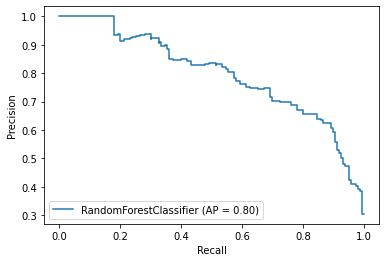

In [76]:
y_test, y_predict, precision, recall = random_forest(X_train, X_test, y_train, y_test)

In [77]:
df = pd.DataFrame(columns = ["precision", "recall"])
df["precision"] = precision
df["recall"] = recall
df.to_csv("precison_recall.csv")

In [65]:
df = pd.DataFrame(columns = ["y_test", "y_pred"])
df["y_test"] = y_test
df["y_pred"] = y_predict
df.to_csv("predicted_results.csv")

In [66]:
df

,y_test,y_pred
0,0.0,0.05
1,0.0,0.10
2,0.0,0.13
3,0.0,0.17
4,0.0,0.07
...,...,...
595,0.0,0.00
596,0.0,0.05
597,0.0,0.00
598,0.0,0.02


In [ ]:
# methods = ["NB", "LR", "SVM", "RF"]
methods = ["RF"]

def read_data(file_name):
    file = np.genfromtxt(file_name,delimiter=',')
    X = file[:-1]
    Y = file[-1]
    return X.T, Y


def evaluation_results(y_test, y_predict):
    accuracy = accuracy_score(y_test, y_predict)*100
    recall = recall_score(y_test, y_predict)*100
    precision = precision_score(y_test, y_predict)*100
    f1 = f1_score(y_test, y_predict)*100
    auc = roc_auc_score(y_test, y_predict)*100
    prc = average_precision_score(y_test, y_predict)
    return [accuracy, precision, recall, f1, auc, prc]


def print_results(file_name, method, result):
    # print(file_name.split("/")[1].split(".")[0] + " with " + method)
    print("Accuracy: %.1f" % result[0])
    print("Precision: %.1f" % result[1])
    print("Recall: %.1f" % result[2])
    print("F1 Score: %.1f" % result[3])
    print("Area Under Curve: %.1f" % result[4])
    print("Area Under PRC: %.3f" % result[5])
    print("\n")


def naive_bayes(x_train, x_test, y_train, y_test):
    gaussian_nb = GaussianNB()
    gaussian_nb.fit(x_train, y_train)
    y_predict = gaussian_nb.predict(x_test)
    # print(y_predict)
    return evaluation_results(y_test, y_predict)


def logisitc_regression(x_train, x_test, y_train, y_test):
    logistic_reg = LogisticRegression(solver='lbfgs') # C=1.0, default. solver="lbfgs", default
    logistic_reg.fit(x_train, y_train)
    y_predict = logistic_reg.predict(x_test)
    # print(y_predict)
    return evaluation_results(y_test, y_predict)


def suppot_vaector_machine(x_train, x_test, y_train, y_test):
    support_vector = LinearSVC(random_state=0, tol=1e-5)
    support_vector.fit(x_train, y_train)
    y_predict = support_vector.predict(x_test)
    # print(y_predict)
    return evaluation_results(y_test, y_predict)


def random_forest(x_train, x_test, y_train, y_test):
    rand_forest = RandomForestClassifier(max_depth = 200, random_state=0)
    rand_forest.fit(x_train, y_train)
    y_predict = rand_forest.predict_proba(x_test)
    precision, recall, theta = precision_recall_curve(y_test, y_predict[:,1])
    print(theta)
    print(len(precision), len(recall))
    # print(precision, recall)
    disp = plot_precision_recall_curve(rand_forest, x_test, y_test)
    # print(disp)
    # print(y_predict[:,1])
    return evaluation_results(y_test, y_predict)


def k_fold_training(X, Y, model):
    # x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
    results = []
    kf = KFold(n_splits = 5)
    kf.get_n_splits(X)
    for train_index, test_index in kf.split(X):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        if model == "NB":
            result = naive_bayes(x_train, x_test, y_train, y_test)
        elif model == "LR":
            result = logisitc_regression(x_train, x_test, y_train, y_test)
        elif model == "SVM":
            result = suppot_vaector_machine(x_train, x_test, y_train, y_test)
        elif model == "RF":
            result = random_forest(x_train, x_test, y_train, y_test)
        results.append(result)

    results = np.array(results)
    final_result = np.mean(results, axis = 0)
    return final_result